## Macy's Data Processing
This notebook shows how the data was loaded and process for graphing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# I got some error that required me to uninstall pandas 1.2.5 and use 1.2.4
print (pd.__version__) 

1.2.4


In [4]:
# Function to set some column to be the time index
# df is the dataframe, origin_column_name is what column will be made the index, 
# index_column_name is an optional paramerter.  If used, it will create a new column, 
# for the index, called index_column_name, otherwise the origin will be transformed

def set_time_index(df, origin_column_name, index_column_name=None):
    if index_column_name is None:
        index_column_name=origin_column_name
    df[index_column_name]=pd.to_datetime(df[origin_column_name])
    df.set_index(index_column_name, inplace=True)



In [9]:
# Create a dictionary of dataframes
# The data is resampled to be the median of one minute intervals
#   --> The median is used to filter out sensor errors which
#       occasionally produce extremely large or small values
# The data is filtered so that only rows where "kW > 0" are used.
#

filenames = [
 'Macys\\macys10-01to10-31-2019-1s.csv',
 'Macys\\macys11-01to11-30-2019-1s.csv',
 'Macys\\macys12-01to12-31-2019-1s.csv',
 'Macys\\macys01-01to01-31-2020-1s.csv',
 'Macys\\macys02-01to02-29-2020-1s.csv',
 'Macys\\macys03-01to03-31-2020-1s.csv',
 'Macys\\macys04-01to04-30-2020-1s.csv',
 'Macys\\macys05-01to05-31-2020-1s.csv',
 'Macys\\macys06-01to06-30-2020-1s.csv',
 'Macys\\macys07-01to07-31-2020-1s.csv',
 'Macys\\macys08-01to08-31-2020-1s.csv',
 'Macys\\macys09-01to09-30-2020-1s.csv',
 'Macys\\macys10-01to10-31-2020-1s.csv',
 'Macys\\macys11-01to11-30-2020-1s.csv',
 'Macys\\macys12-01to12-31-2020-1s.csv'
]
months = [
    'Oct 2019',
    'Nov 2019',
    'Dec 2019',
    'Jan 2020',
    'Feb 2020',
    'Mar 2020',
    'Apr 2020',
    'May 2020',
    'Jun 2020',
    'Jul 2020',
    'Aug 2020',
    'Sep 2020',
    'Oct 2020',
    'Nov 2020',
    'Dec 2020'
]
datadict = {}
for month, name in zip(months,filenames):
    data = pd.read_csv(name)
    set_time_index(data, 'time')
    datadict[month] = data[(data.kw>0)].resample("min").median()
    # add 'number of compressors' column
    datadict[month]['n_compressors'] = datadict[month]['compressor1']+datadict[month]['compressor2']+datadict[month]['compressor3']+datadict[month]['compressor4']

In [10]:
# Data can now be accessed by month and column name
datadict['Oct 2019'].columns

Index(['name', 'tags', 'velocity', 'cfm', 'compressor1', 'compressor2',
       'compressor3', 'compressor4', 'COP', 'Delta_Enthalpy', 'deltat',
       'dewpoint1', 'dewpoint2', 'eer', 'kw', 'kwton', 'currenta',
       'currentavg', 'currentb', 'currentc', 'powersum', 'VoltAB', 'VoltBC',
       'VoltAC', 'VoltAvg', 'totalCapacity_TONS', 'OAtemp', 'powerfactor',
       'humidity1', 'temp1', 'enthalpy1', 'humidity2', 'temp2', 'enthalpy2',
       'totalCapacity_BTU', 'wetbulb1', 'wetbulb2', 'n_compressors'],
      dtype='object')

In [18]:
# An example of summary statistics for one month
datadict['Oct 2019'].describe()

,name,tags,velocity,cfm,compressor1,compressor2,compressor3,compressor4,COP,Delta_Enthalpy,...,powerfactor,humidity1,temp1,enthalpy1,humidity2,temp2,enthalpy2,totalCapacity_BTU,wetbulb1,wetbulb2
count,5076.0,0.0,5076.000000,5076.000000,5076.0,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,...,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,366.0,NaN,487.353686,5068.030010,1.0,0.507147,0.056091,0.016182,2.127010,6.590762,...,0.810422,44.840104,81.373951,30.693322,85.068354,59.139895,24.102560,155522.376212,66.508231,56.831668
std,0.0,NaN,255.657170,1933.472615,0.0,0.485734,0.229312,0.125030,0.783274,2.175822,...,0.020572,9.279789,2.568285,1.659736,10.506248,4.505806,2.503591,94173.932316,2.046221,3.735574
min,366.0,NaN,-449.555556,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,-1.507556,...,0.540000,32.000000,67.000000,26.084286,44.630435,51.000000,19.430000,0.000000,60.182143,49.164000
25%,366.0,NaN,461.794444,4617.944444,1.0,0.000000,0.000000,0.000000,1.951761,4.970000,...,0.799556,39.000000,80.000000,30.175087,81.412500,56.000000,22.450000,104313.547391,65.898460,54.226682
50%,366.0,NaN,497.100000,4971.000000,1.0,0.577778,0.000000,0.000000,2.124598,6.993654,...,0.810000,41.642317,82.000000,30.733085,87.000000,58.244444,23.275111,150687.130000,66.566374,55.651889
75%,366.0,NaN,529.437789,5294.377891,1.0,1.000000,0.000000,0.000000,2.399631,8.370000,...,0.829778,48.000000,83.108696,31.210000,94.049638,60.844444,25.456108,196502.811359,67.176464,59.088651
max,366.0,NaN,1218.659574,12186.595745,1.0,1.000000,1.000000,1.000000,12.560710,12.362444,...,0.850000,82.000000,85.000000,39.069778,98.000000,79.000000,37.872941,642583.060000,75.688696,74.836176


<ipython-input-7-c4c99ec29477>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,5))


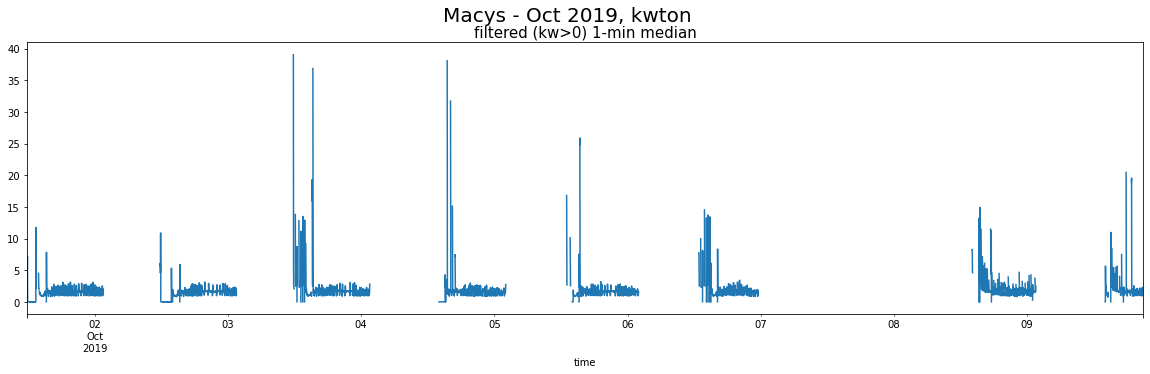

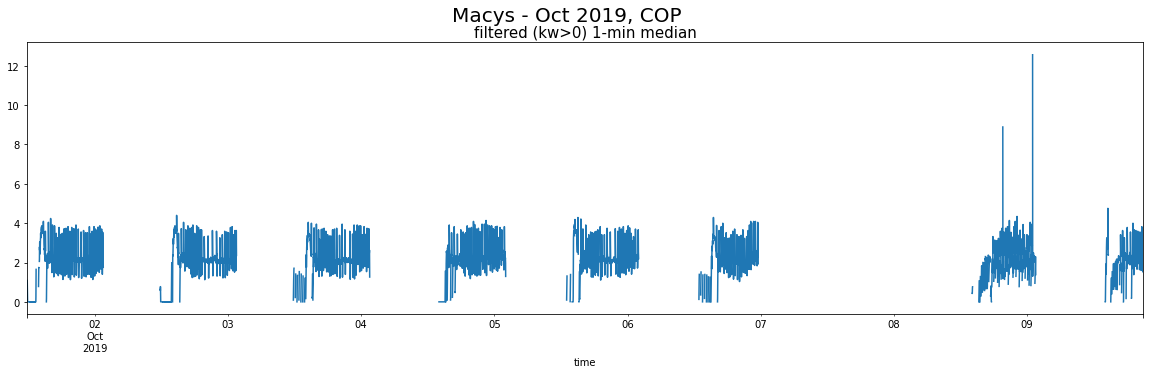

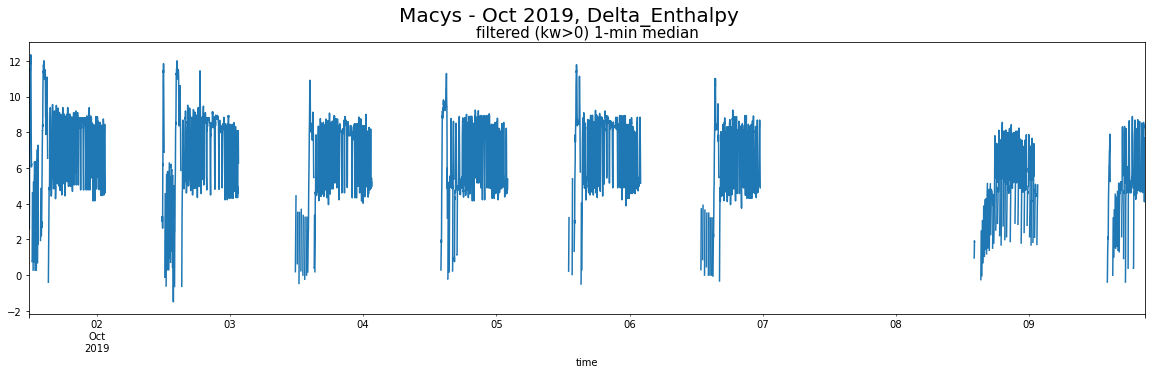

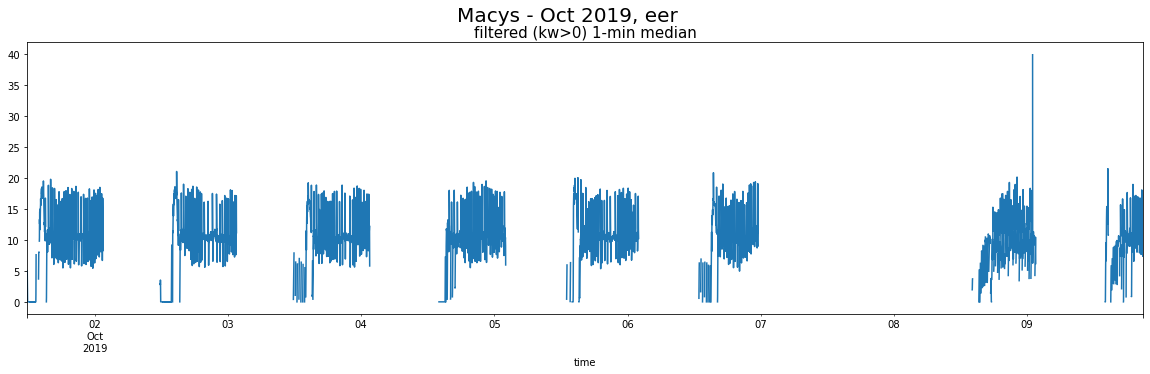

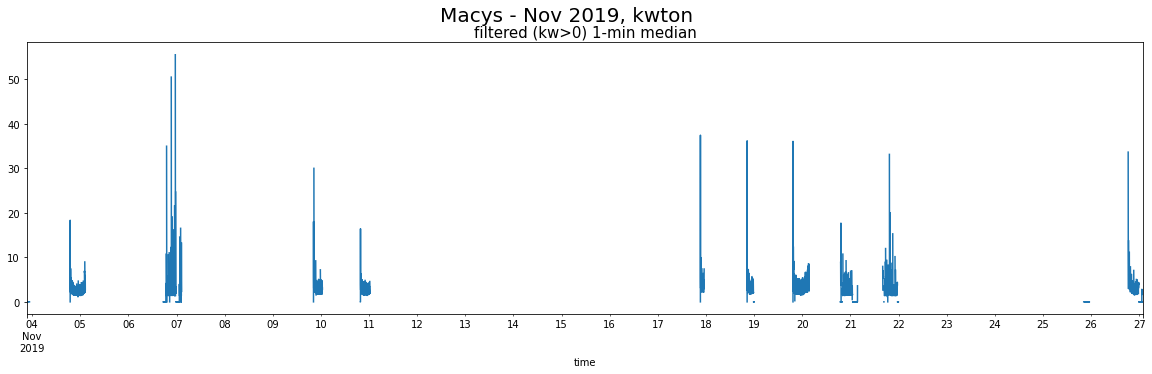

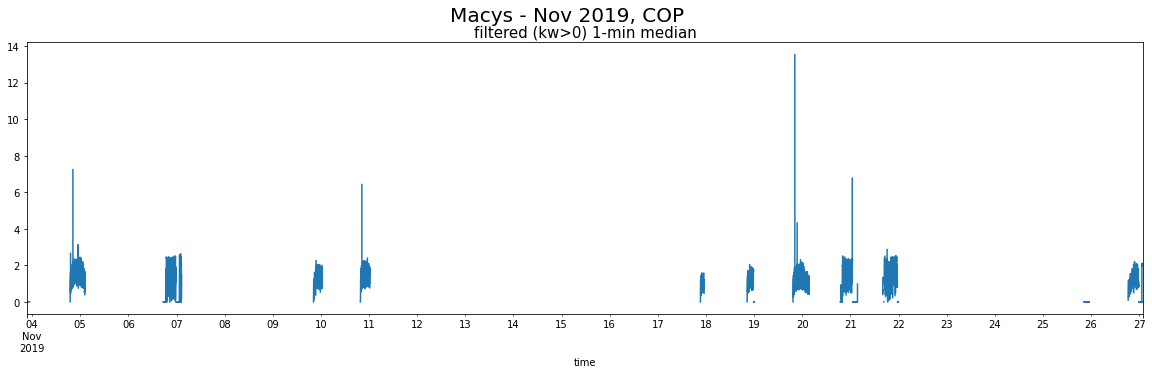

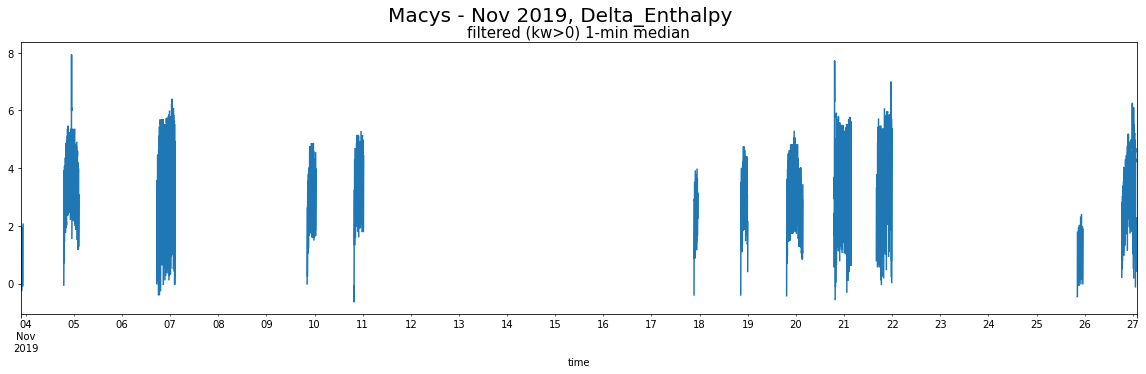

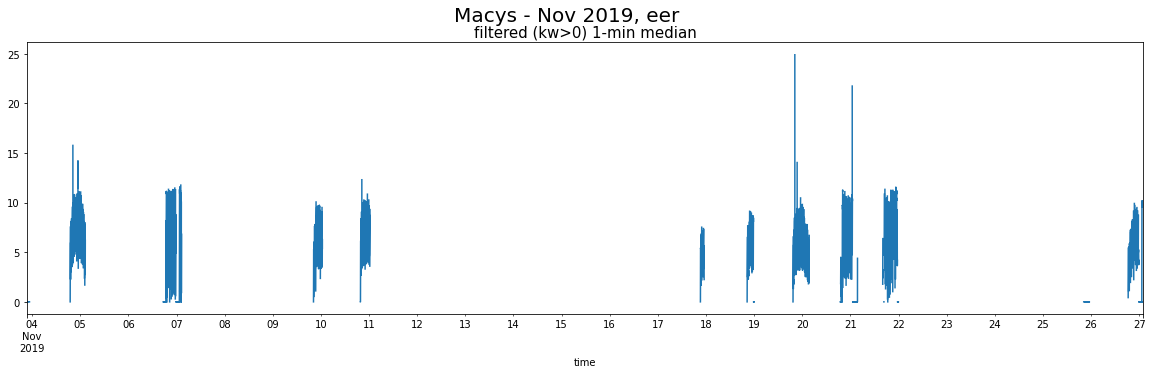

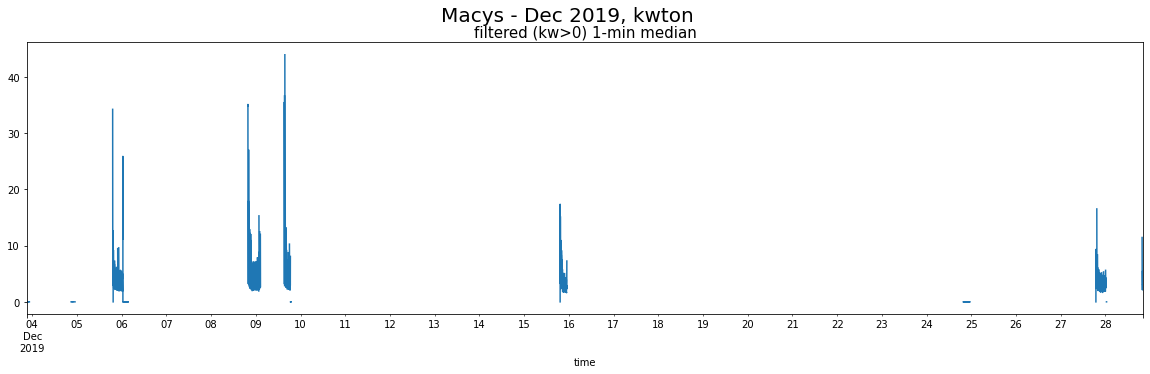

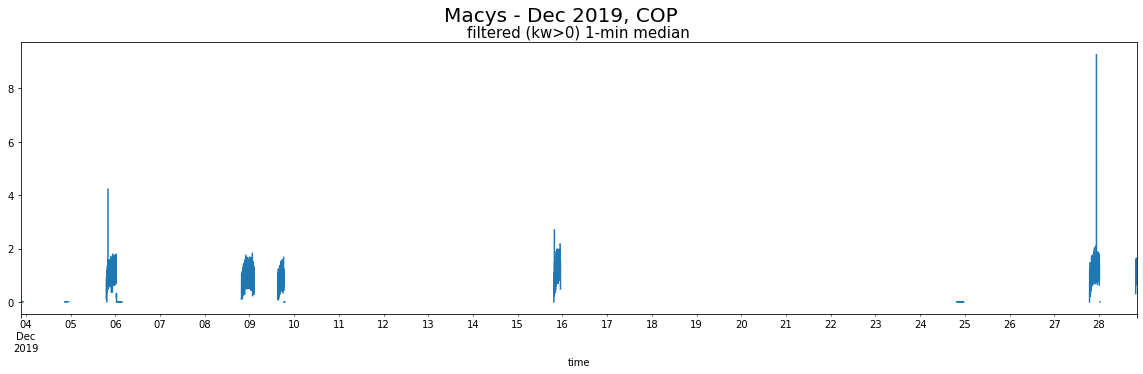

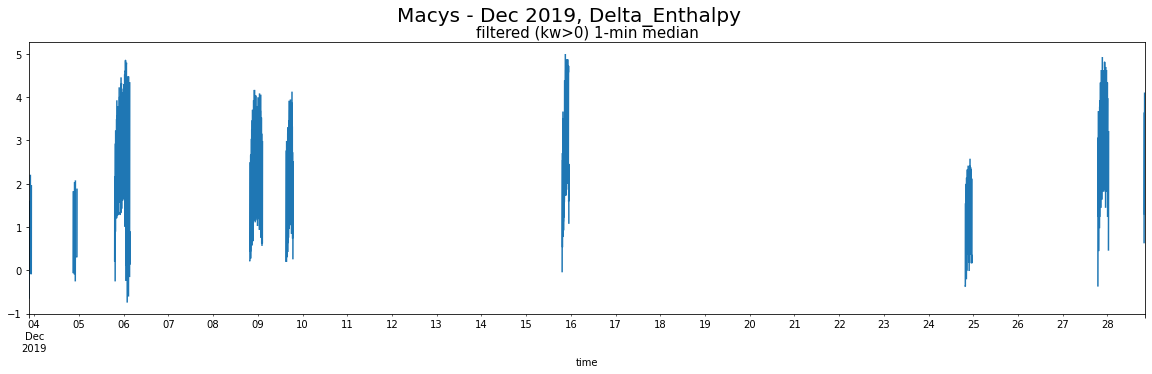

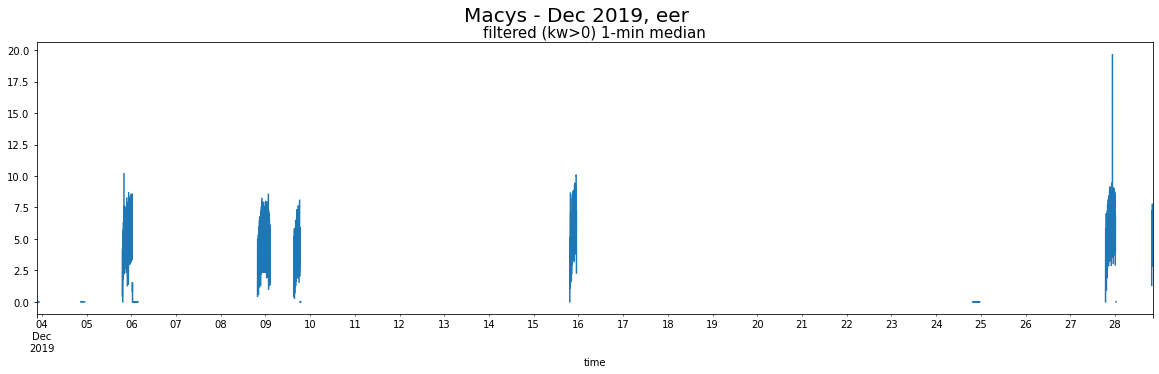

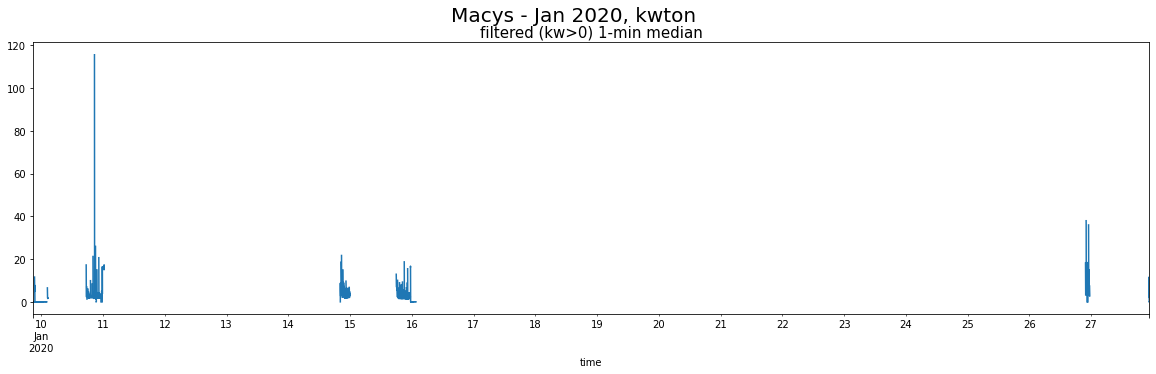

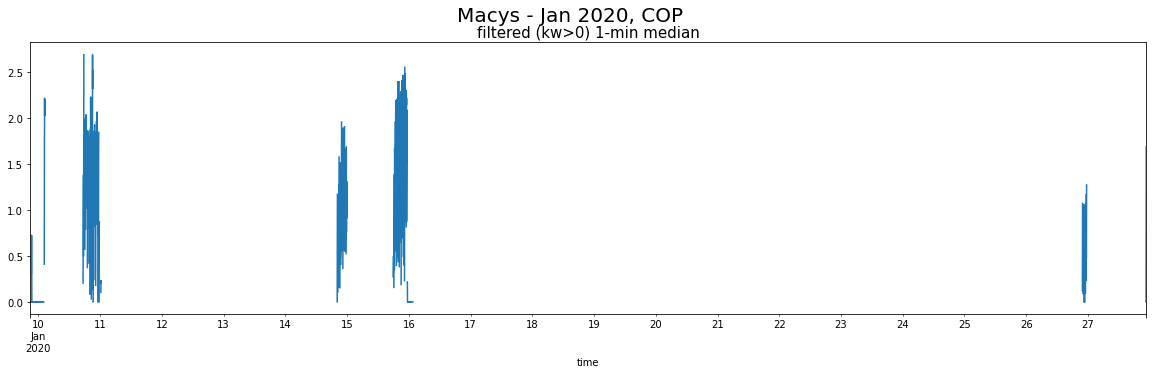

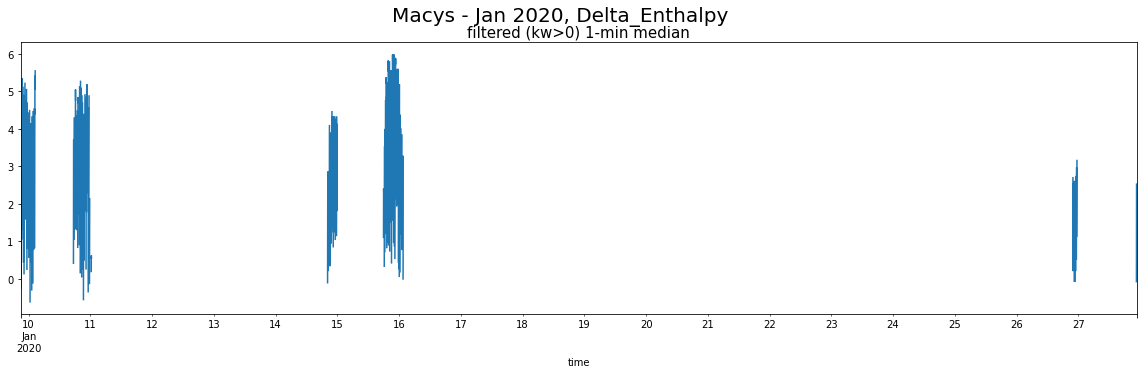

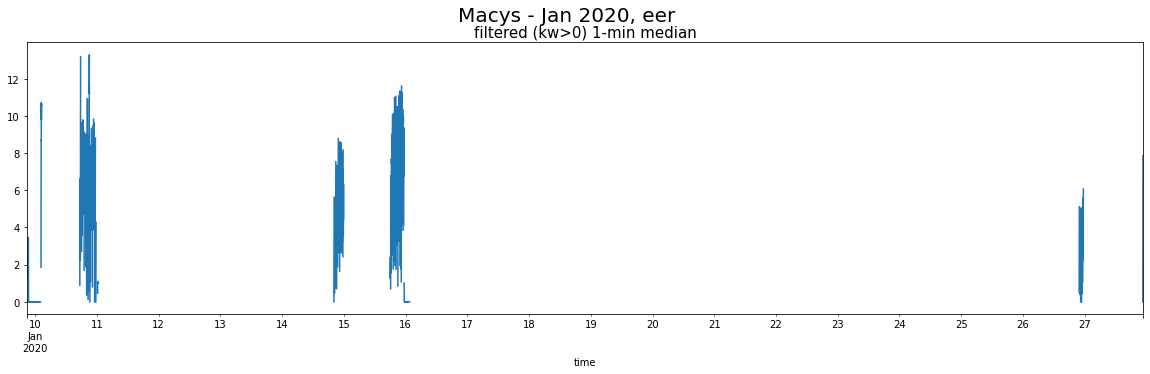

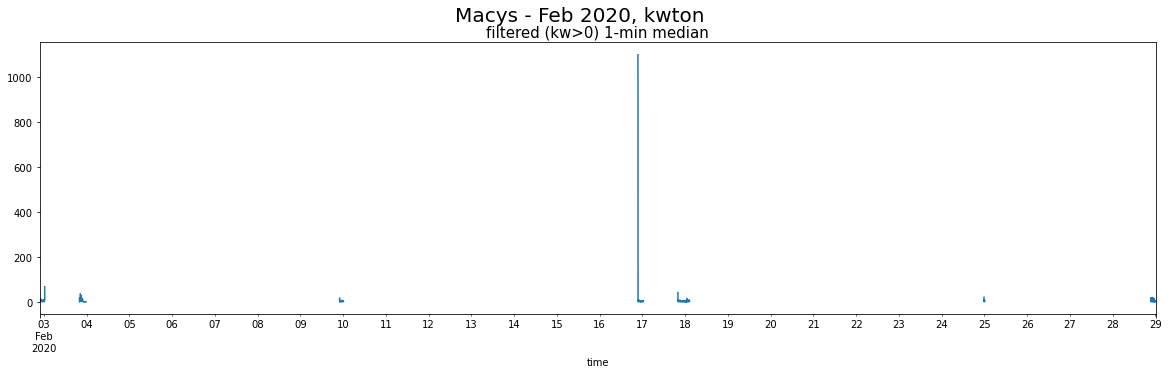

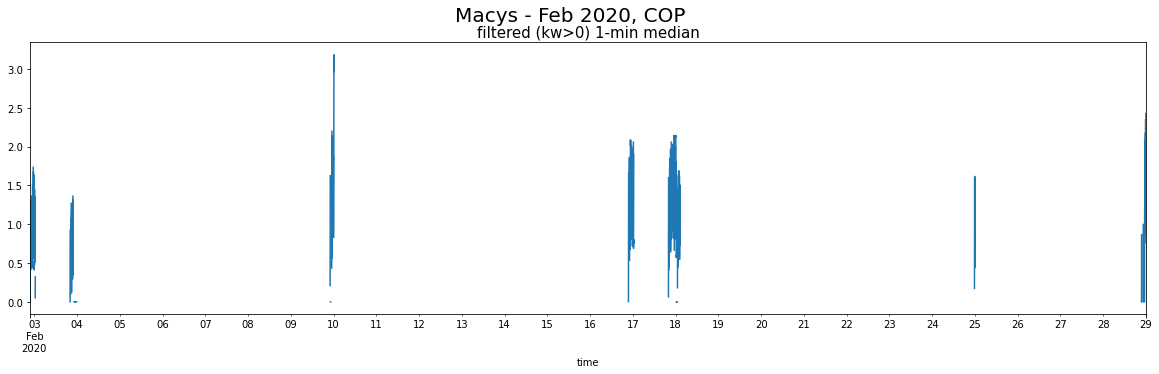

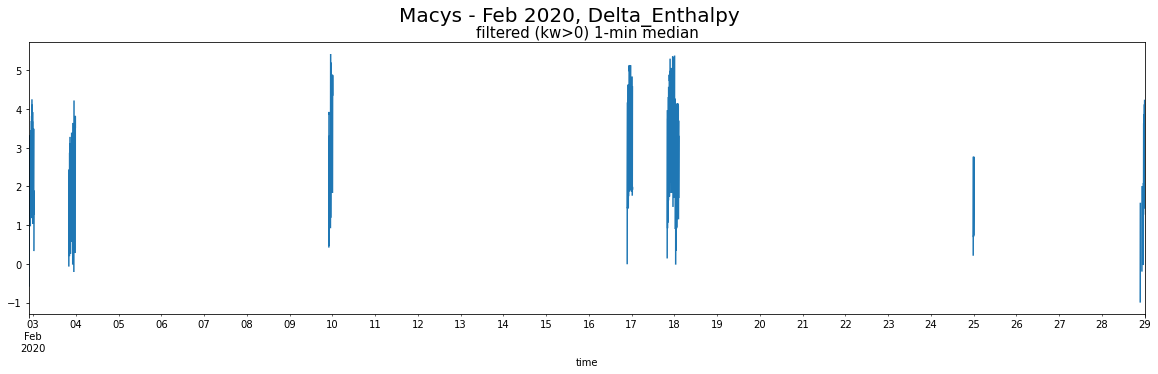

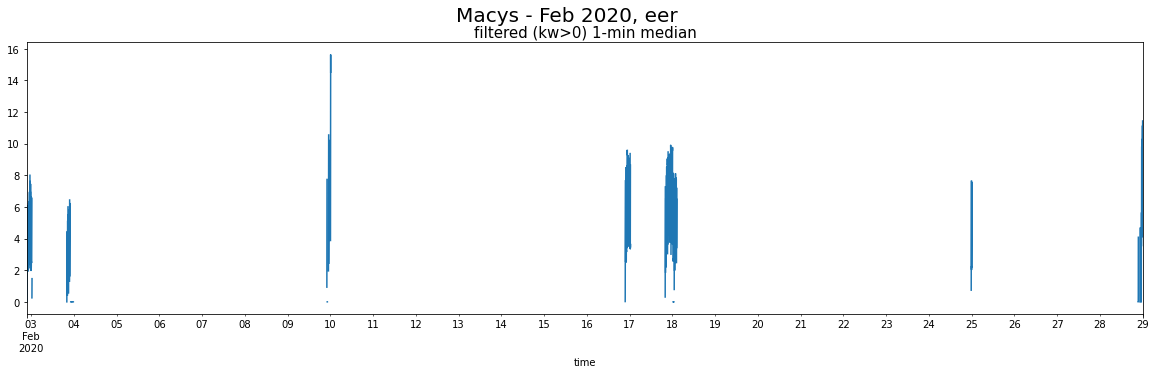

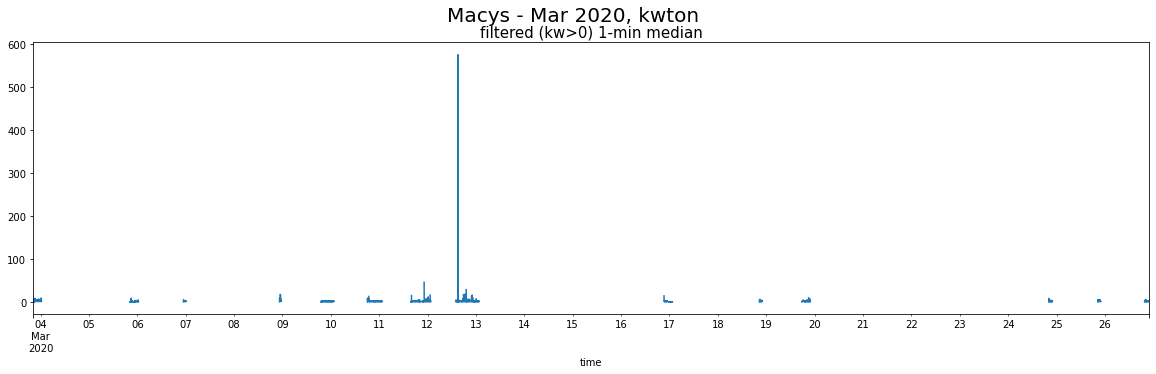

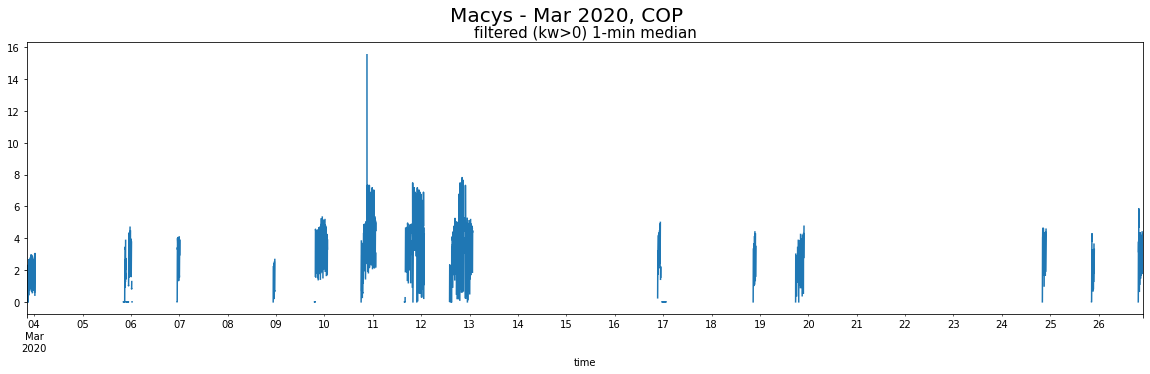

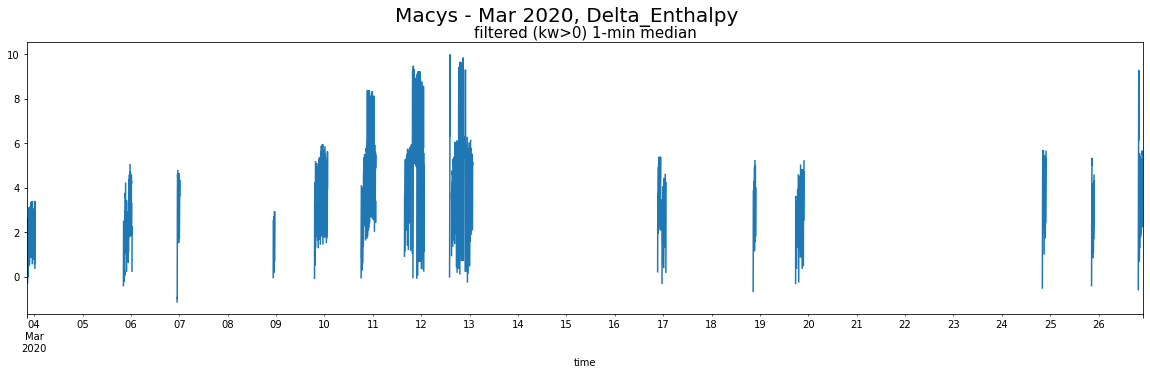

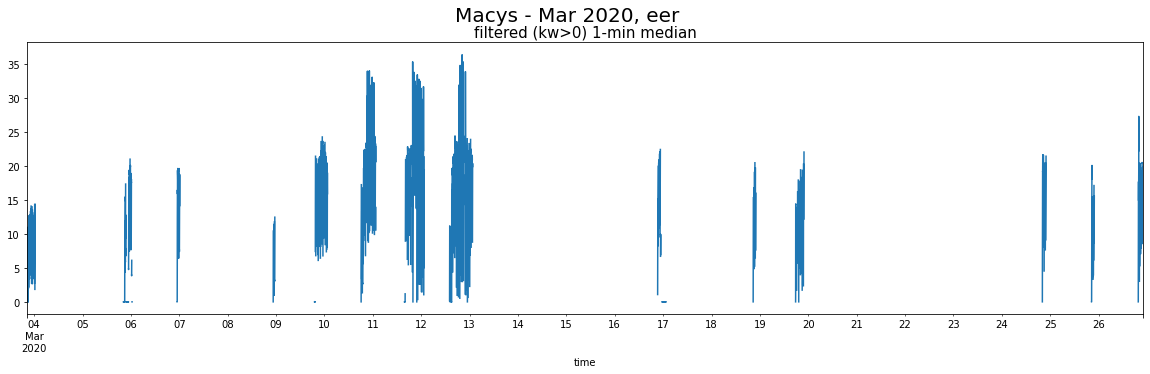

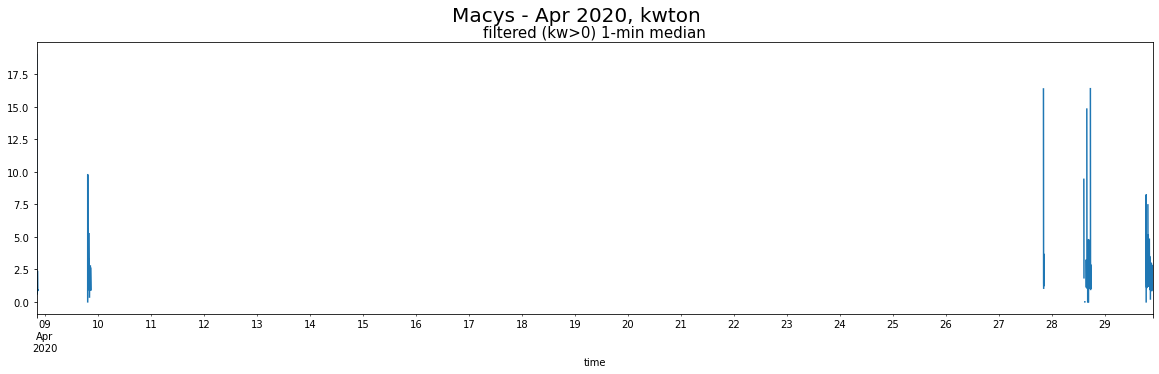

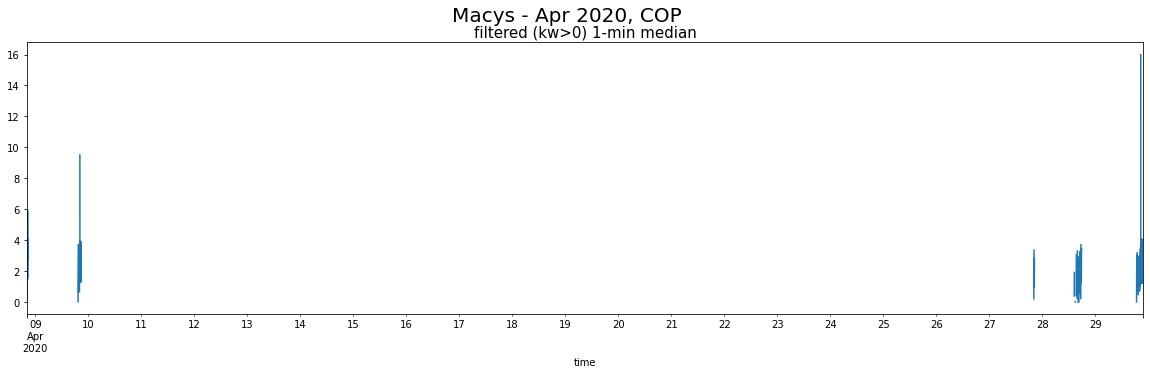

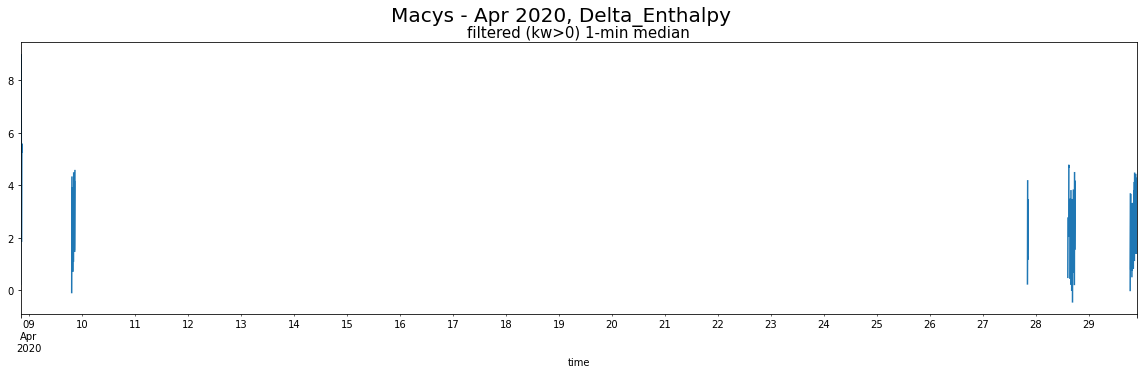

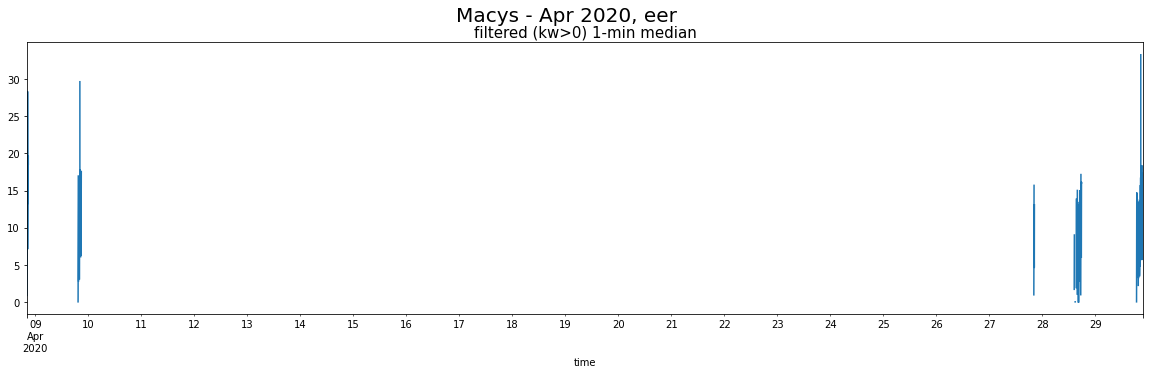

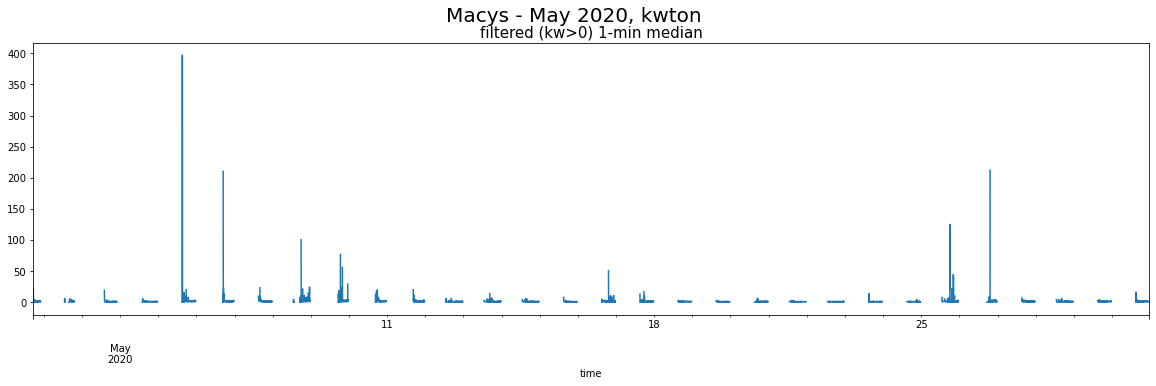

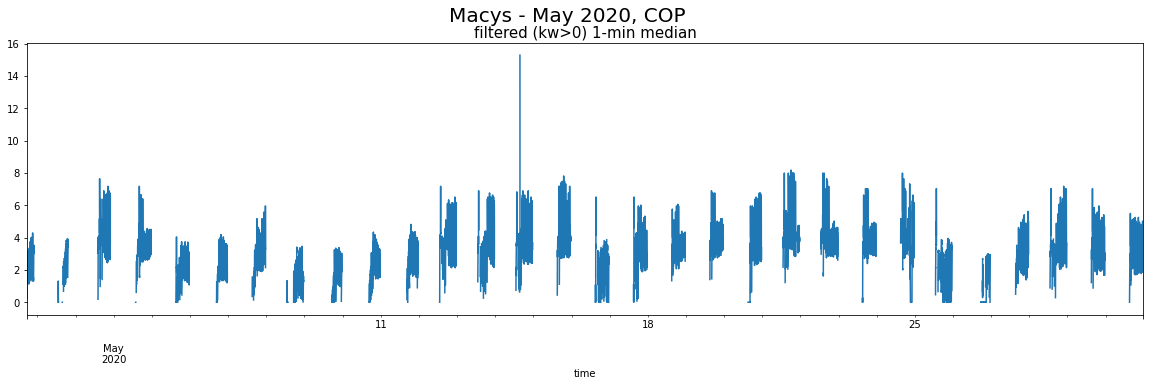

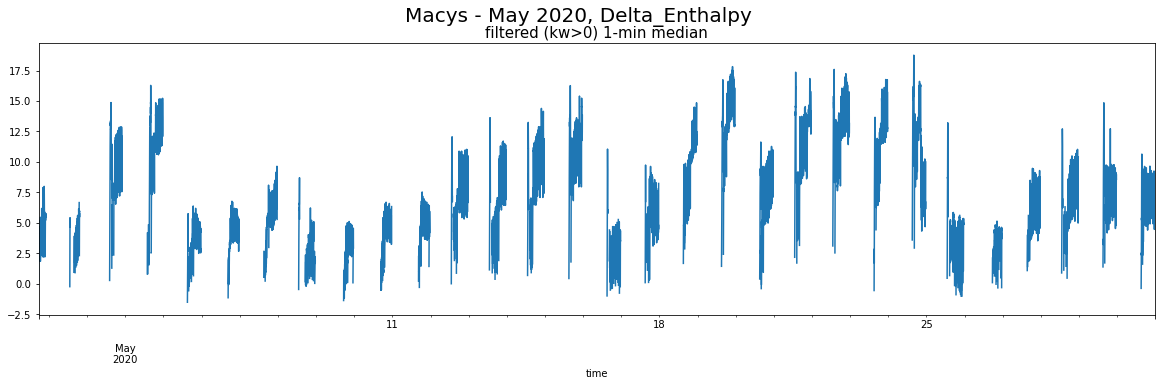

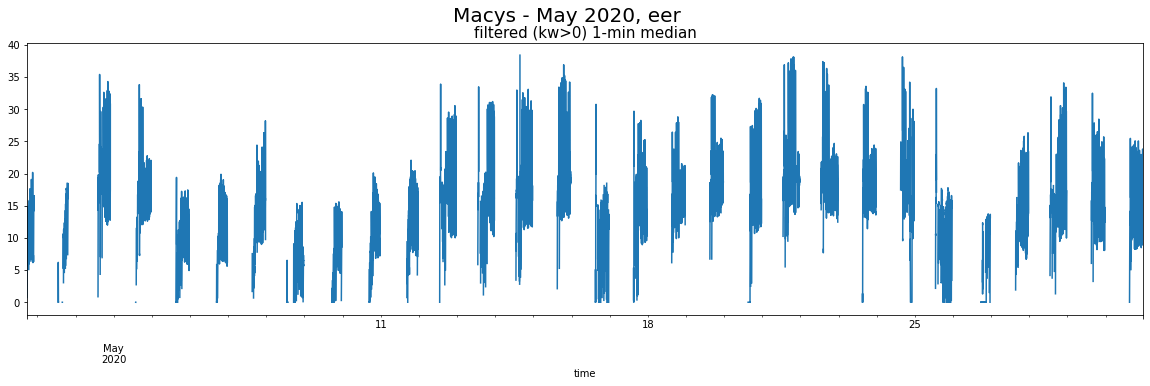

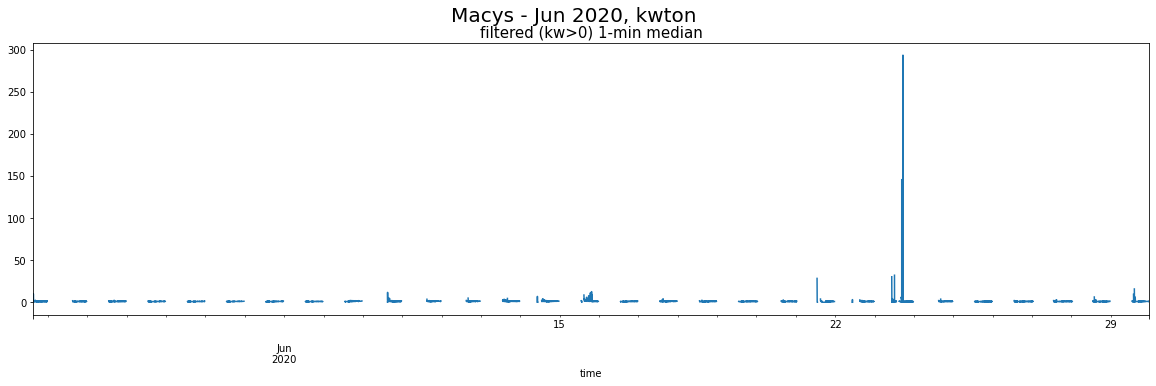

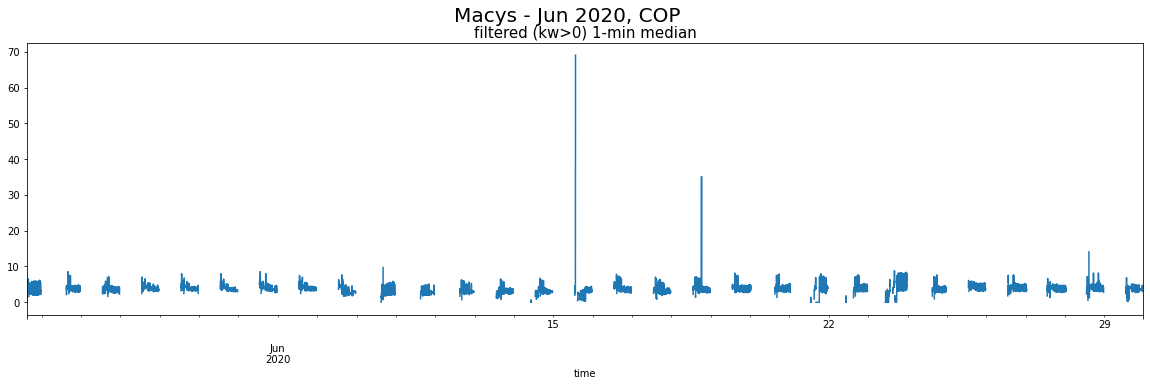

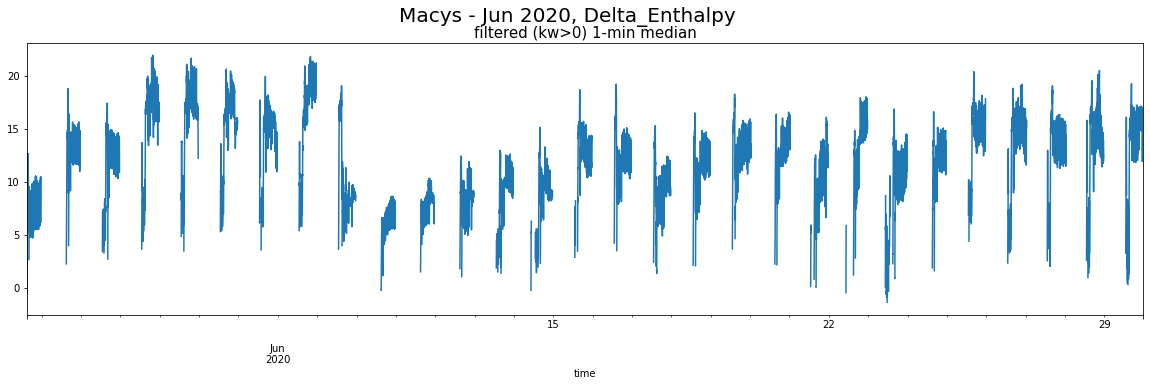

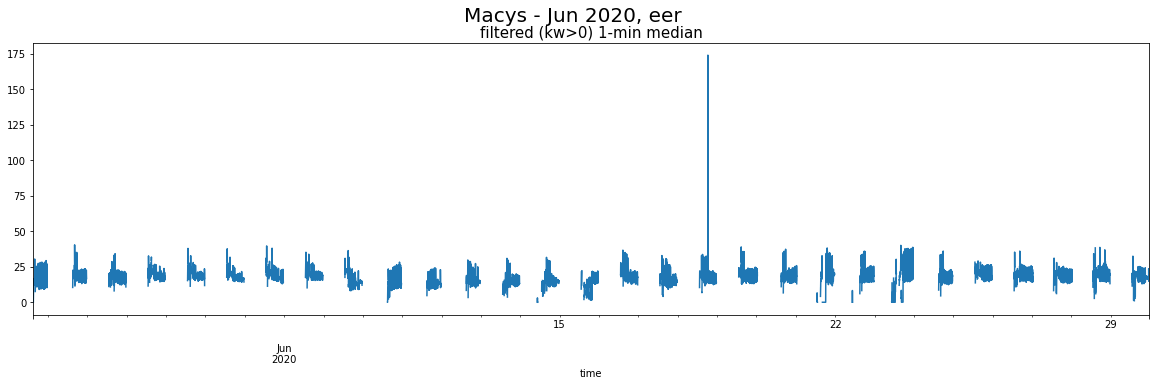

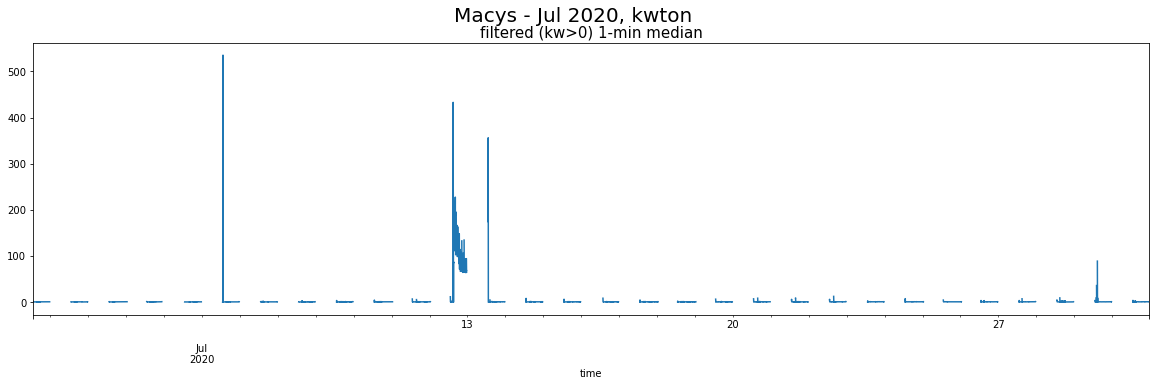

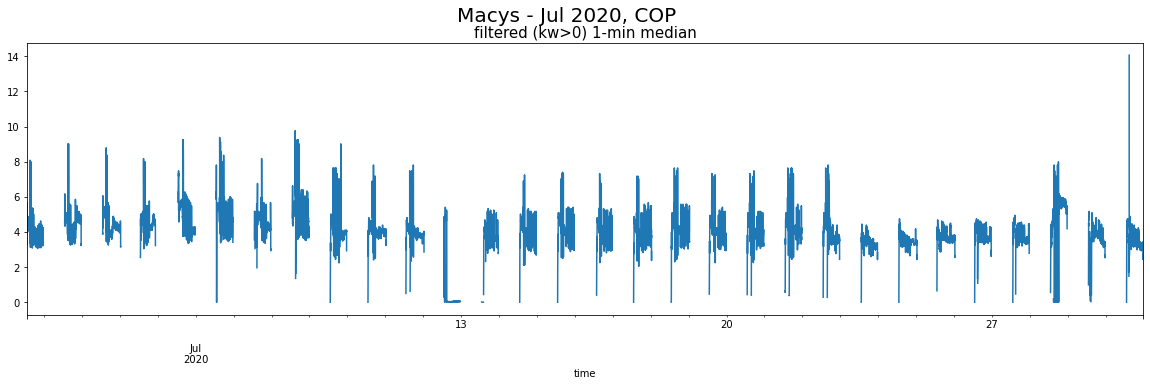

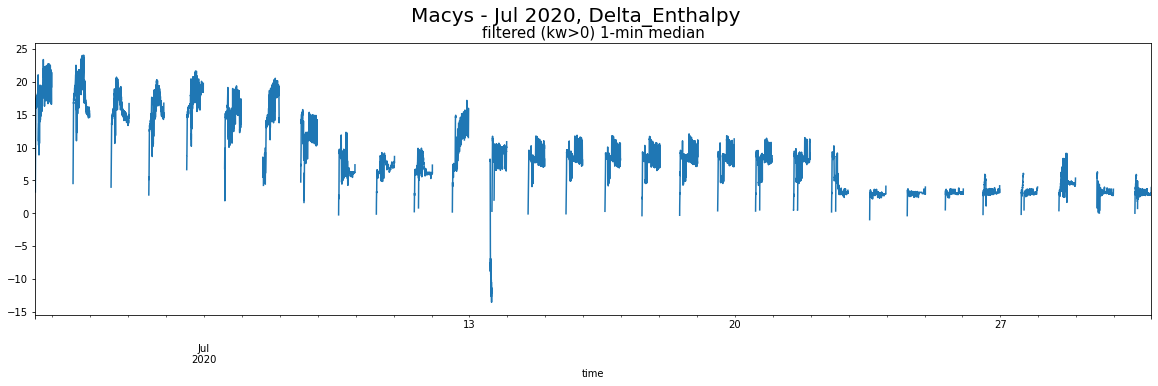

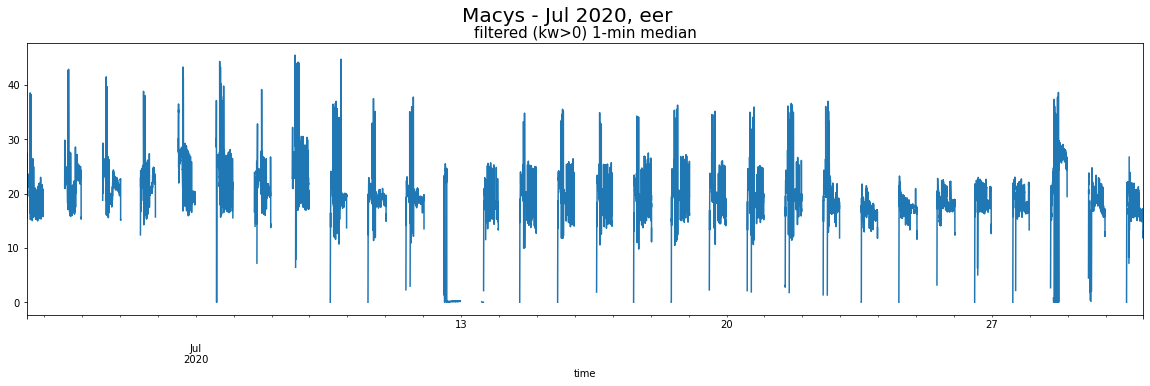

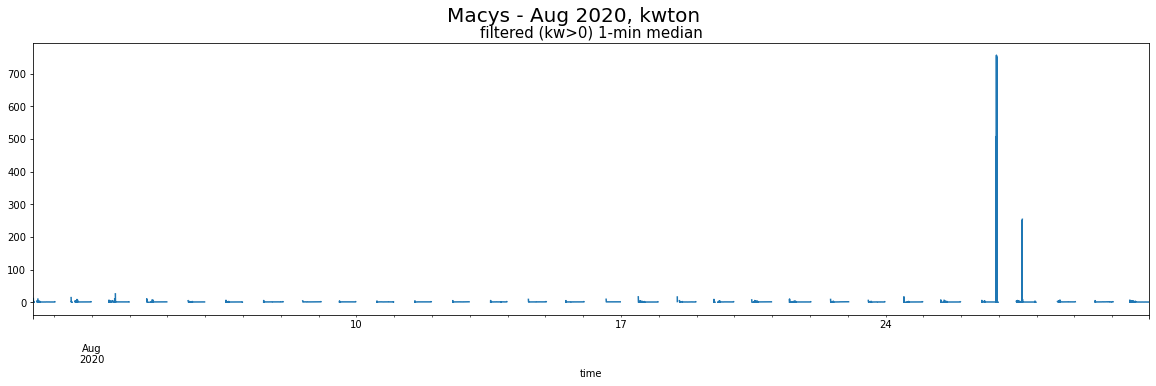

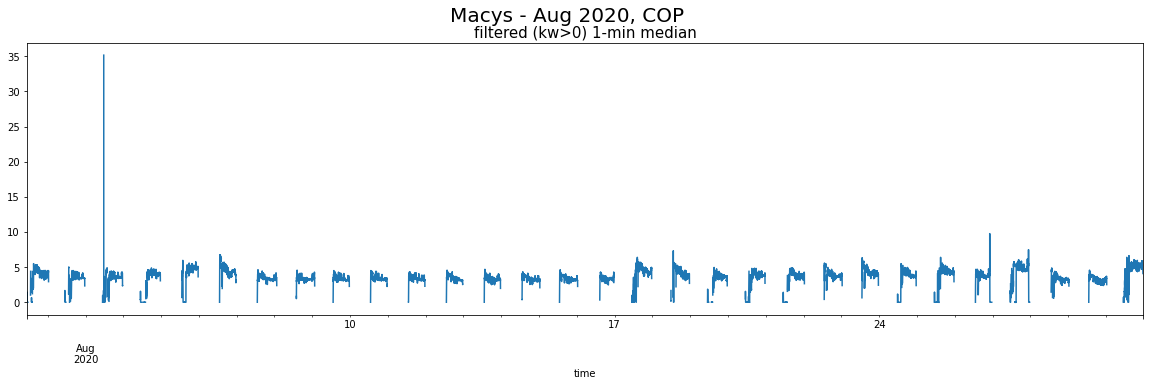

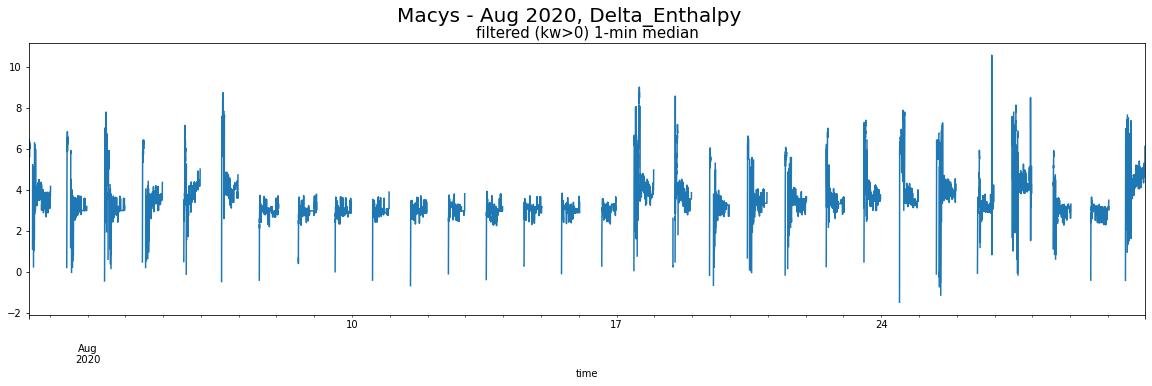

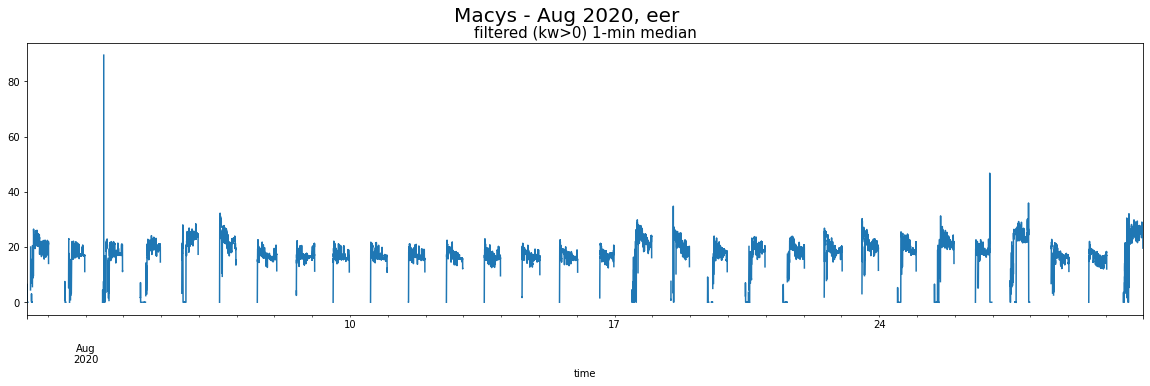

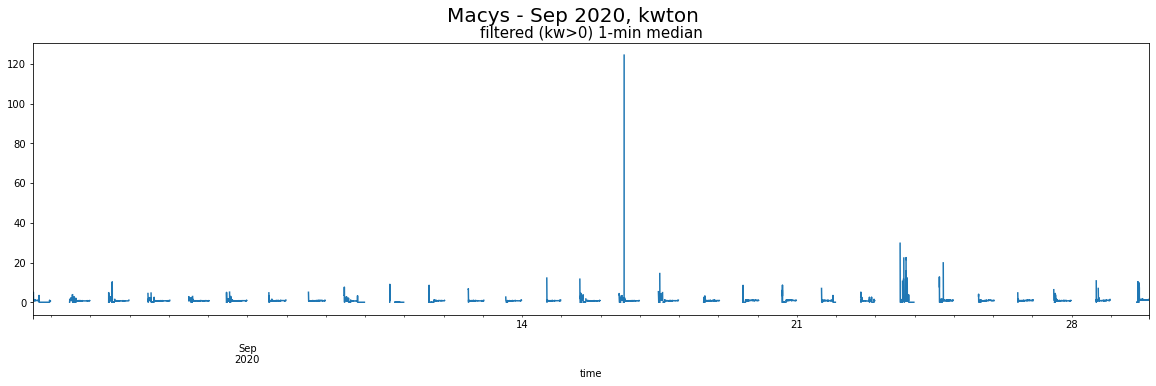

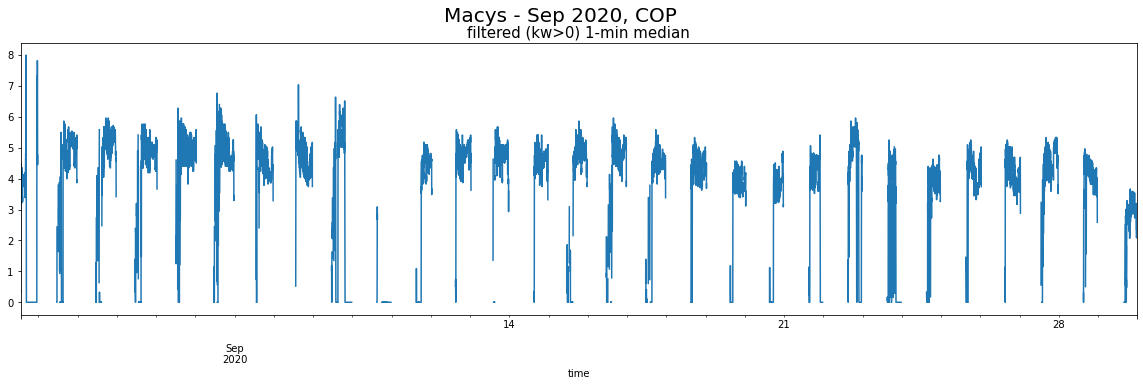

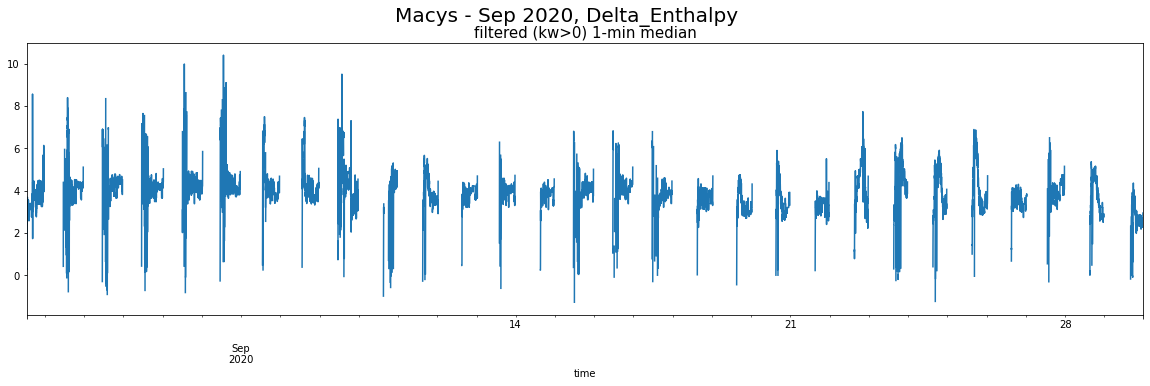

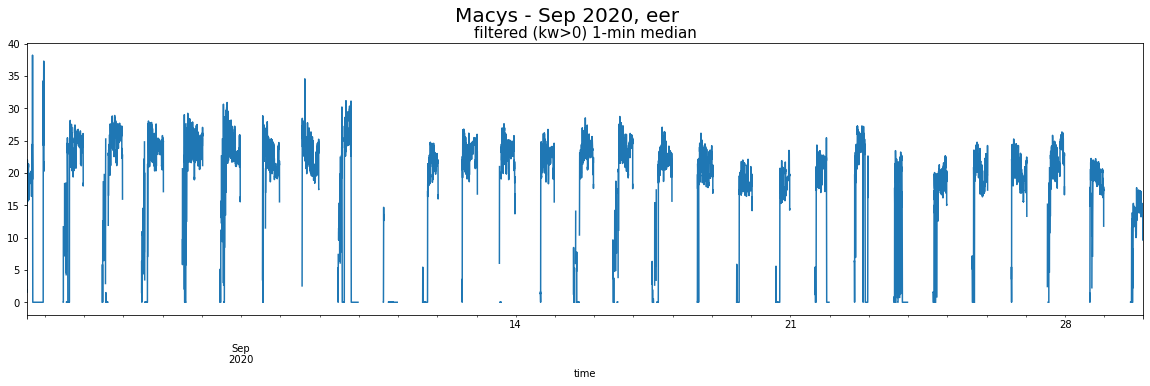

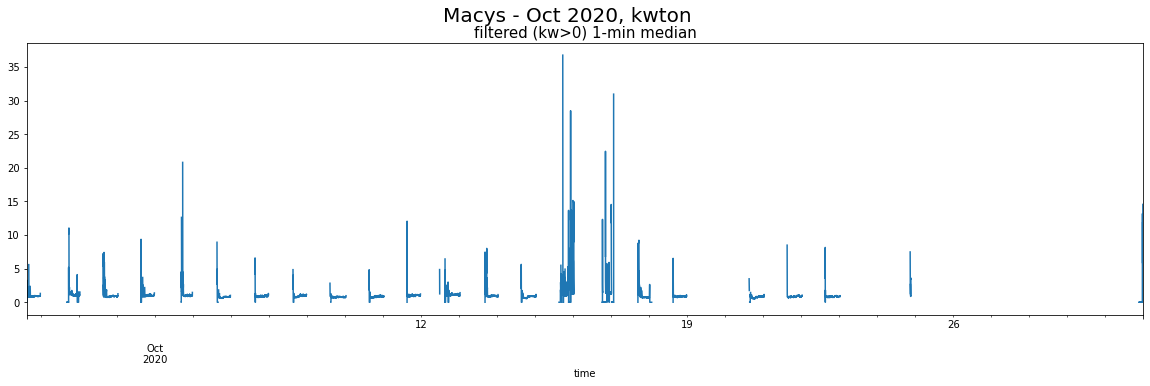

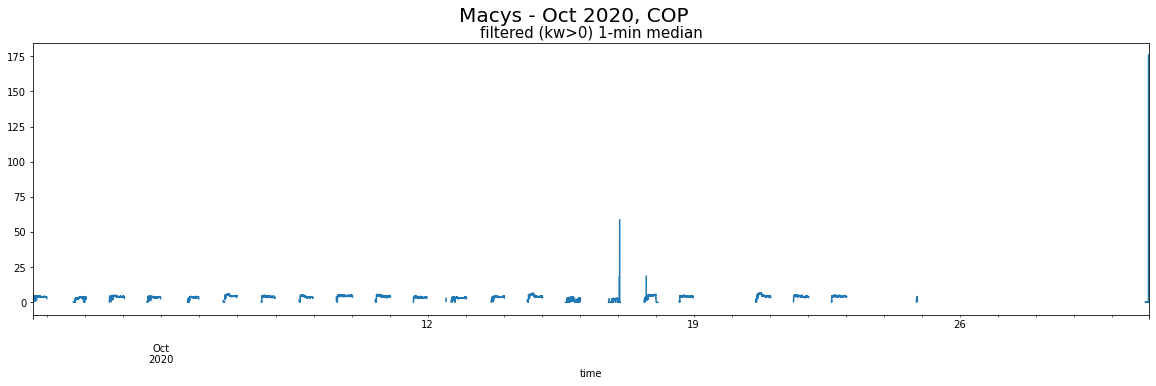

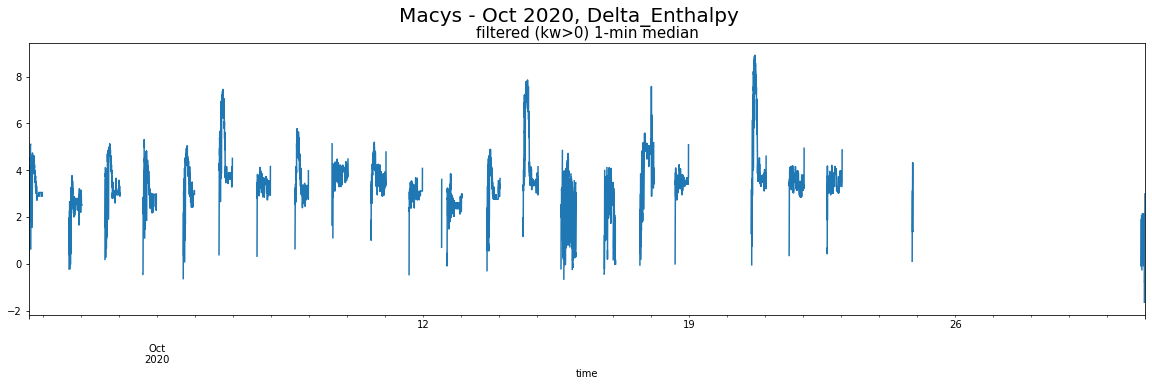

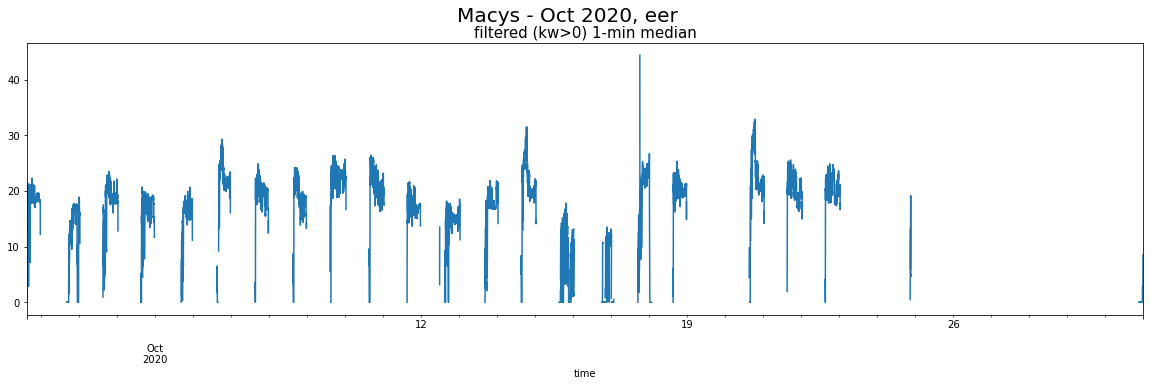

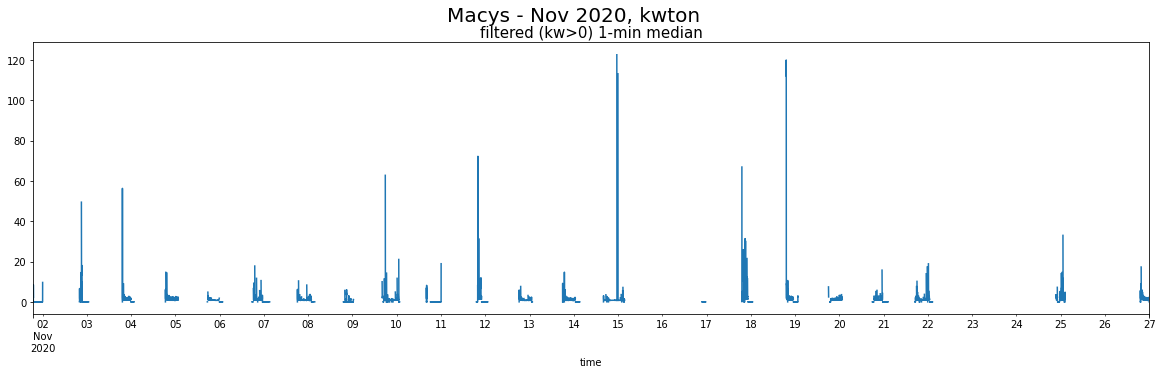

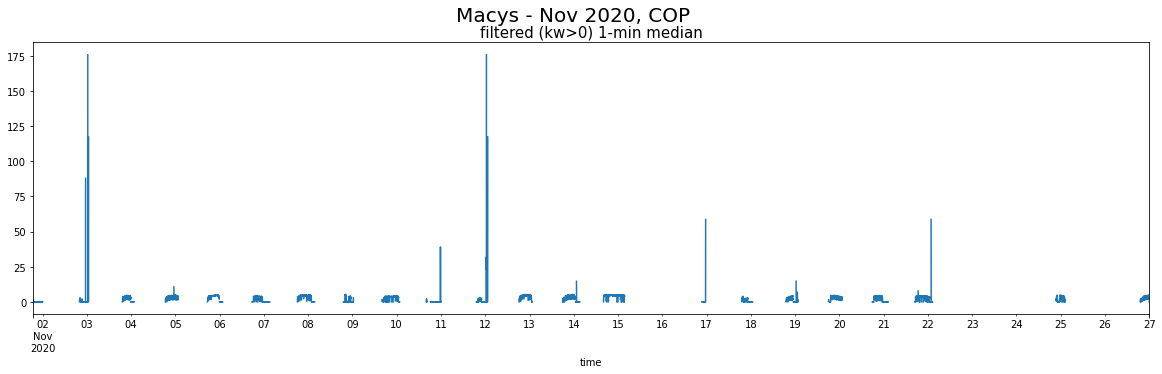

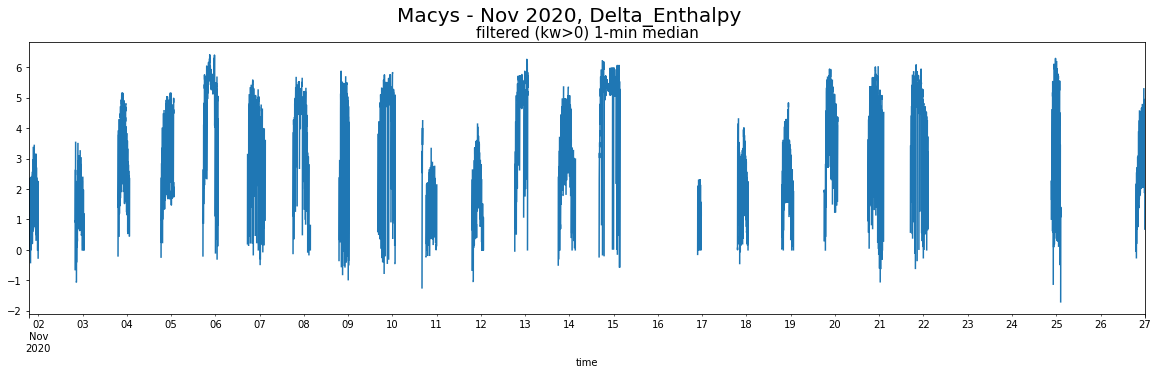

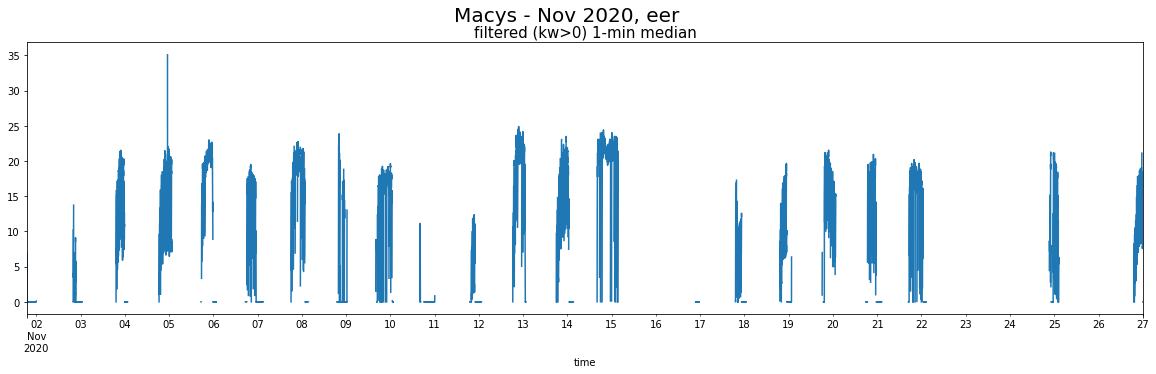

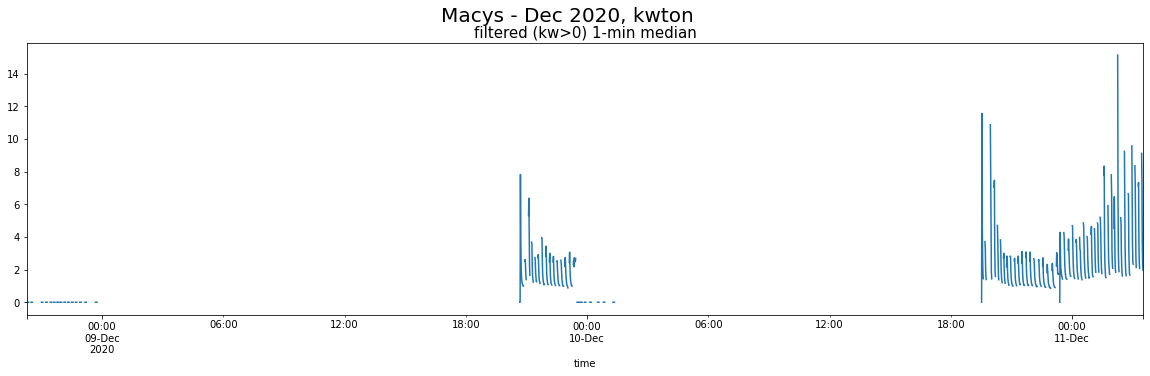

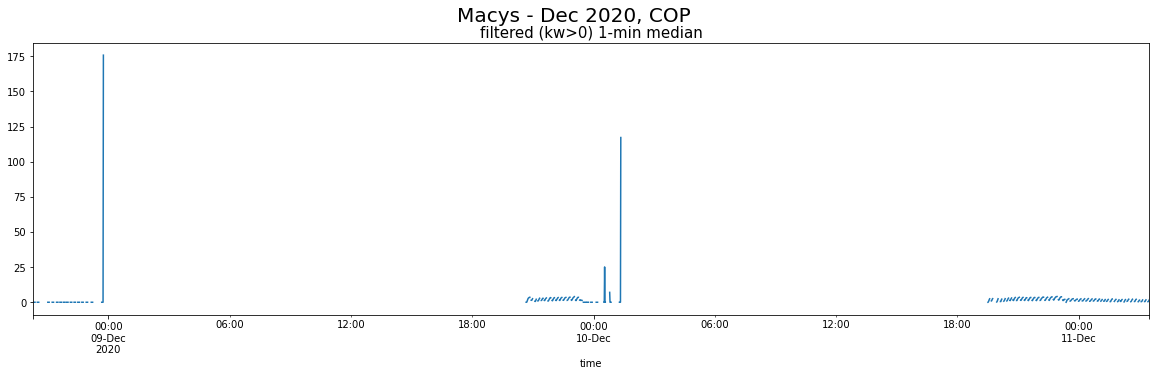

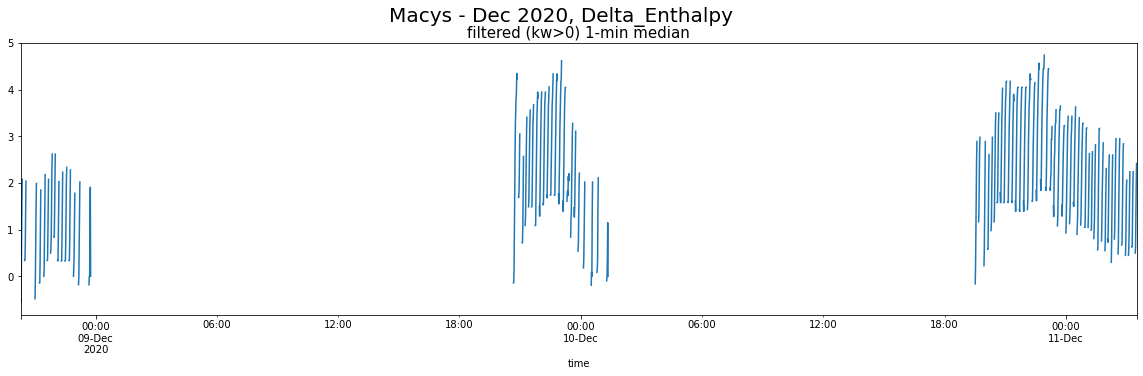

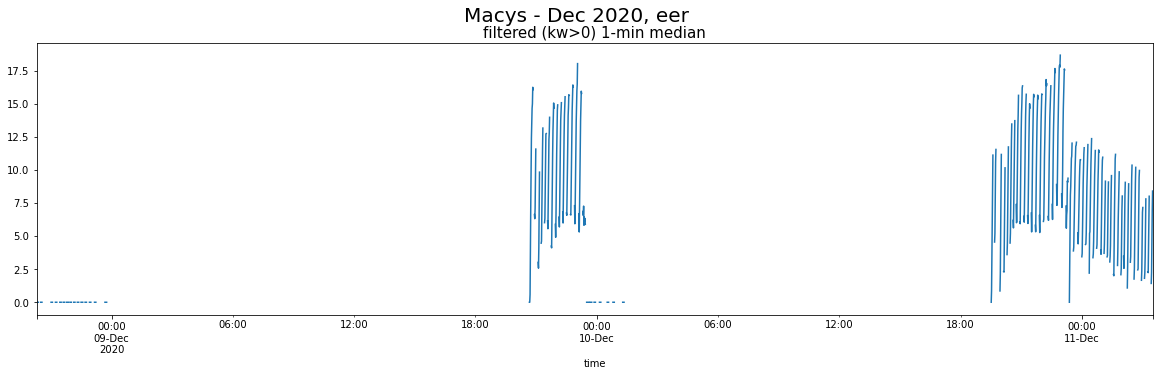

In [7]:
# filtered (kw>0) 1-min median
# Prints out line graphs of the four variable below for all of Macys data
# Generates a warning about having a large number of figures open, but this is normal

columns = ['kwton', 'COP', 'Delta_Enthalpy', 'eer']
for month in datadict:
    for col in columns:
        fig, ax = plt.subplots(figsize=(20,5))
        plt.suptitle('Macys - ' + str(month) + ', ' + col,fontsize=20)
        plt.title('filtered (kw>0) 1-min median', fontsize=15)
        datadict[month][col].plot(ax=ax)

Text(0.5, 0, 'KW, n = 5040')

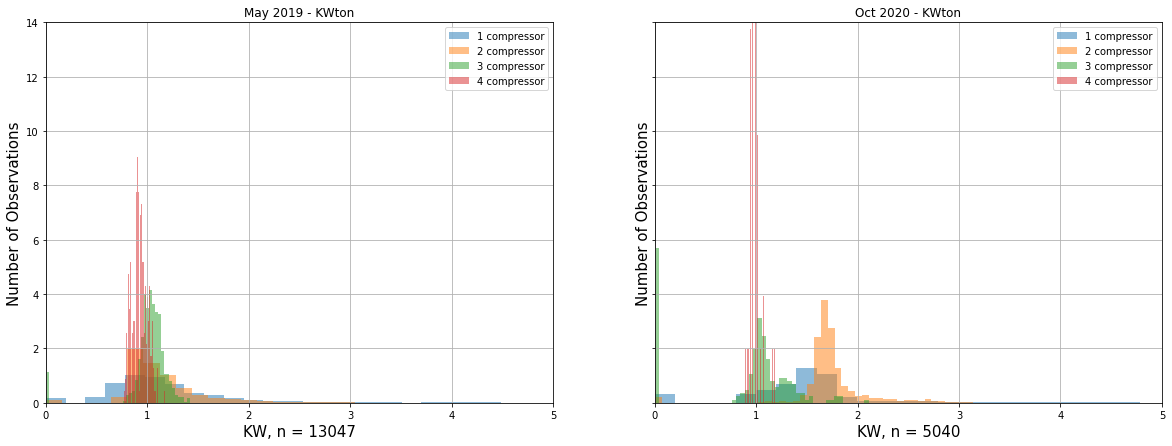

In [12]:
# Generates a side by side histogram.  It is a density plot so that the y scales are in the same
# general range and the figures are similar in size.  The units-as-labeled though are 
# then meaningless.
# Redraw without the sharex=True, sharey=True, and density=True, arguments to see 
# meaningful units.

May = datadict['May 2020']
Oct = datadict['Oct 2019']
May_count = str(len(May[(May.n_compressors>0) & (May.kwton<10)]))
Oct_count = str(len(Oct[(Oct.n_compressors>0) & (Oct.kwton<10)]))

# prepare axes

fig, ax = plt.subplots(nrows=1,ncols=2, sharex=True, sharey=True, figsize=(20,7))

May[(May.n_compressors==1) & (May.kwton<10)].kwton.hist(ax=ax[0],bins=50, label='1 compressor', density=True, alpha=0.5)
May[(May.n_compressors==2) & (May.kwton<10)].kwton.hist(ax=ax[0],bins=50, label='2 compressor', density=True, alpha=0.5)
May[(May.n_compressors==3) & (May.kwton<10)].kwton.hist(ax=ax[0],bins=50, label='3 compressor', density=True, alpha=0.5)
May[(May.n_compressors==4) & (May.kwton<10)].kwton.hist(ax=ax[0],bins=50, label='4 compressor', density=True, alpha=0.5)
Oct[(Oct.n_compressors==1) & (Oct.kwton<10)].kwton.hist(ax=ax[1],bins=50, label='1 compressor', density=True, alpha=0.5)
Oct[(Oct.n_compressors==2) & (Oct.kwton<10)].kwton.hist(ax=ax[1],bins=50, label='2 compressor', density=True, alpha=0.5)
Oct[(Oct.n_compressors==3) & (Oct.kwton<10)].kwton.hist(ax=ax[1],bins=50, label='3 compressor', density=True, alpha=0.5)
Oct[(Oct.n_compressors==4) & (Oct.kwton<10)].kwton.hist(ax=ax[1],bins=50, label='4 compressor', density=True, alpha=0.5)

ax[1].legend()
ax[1].set_title('Oct 2020 - KWton')
ax[0].legend()
ax[0].set_title('May 2019 - KWton')

ax[0].set_ylim([0,10])
ax[0].set_xlim([0,5])
ax[1].set_ylim([0,14])
ax[1].set_xlim([0,5])
ax[0].set_ylabel('Number of Observations', fontsize=15)
ax[1].set_ylabel('Number of Observations', fontsize=15)
ax[0].set_xlabel('KW, n = '+May_count, fontsize=15)
ax[1].set_xlabel('KW, n = '+Oct_count, fontsize=15)